In [35]:
human_data ={'mod_s432': {'mean_observe_per_activation': 8.962962962962964, 'bootstrap_sd': 0.7450116660661218, 'ci_lower': 7.517592592592592, 'ci_upper': 10.371296296296295, 'observe_count': 242, 'activation_count': 27}, 'mod_s442': {'mean_observe_per_activation': 8.11111111111111, 'bootstrap_sd': 0.7479816622766107, 'ci_lower': 6.62962962962963, 'ci_upper': 9.592592592592593, 'observe_count': 219, 'activation_count': 27}, 'mod_s531': {'mean_observe_per_activation': 8.074074074074074, 'bootstrap_sd': 0.7204549577561967, 'ci_lower': 6.62962962962963, 'ci_upper': 9.555555555555555, 'observe_count': 218, 'activation_count': 27}, 'mod_s411': {'mean_observe_per_activation': 6.814814814814815, 'bootstrap_sd': 0.5869521539914861, 'ci_lower': 5.703703703703703, 'ci_upper': 8.037037037037036, 'observe_count': 184, 'activation_count': 27}, 'mod_s421': {'mean_observe_per_activation': 5.481481481481482, 'bootstrap_sd': 0.6207604461143844, 'ci_lower': 4.37037037037037, 'ci_upper': 6.851851851851852, 'observe_count': 148, 'activation_count': 27}, 'mod_s352': {'mean_observe_per_activation': 5.185185185185185, 'bootstrap_sd': 0.5899212162101714, 'ci_lower': 4.111111111111111, 'ci_upper': 6.260185185185184, 'observe_count': 140, 'activation_count': 27}, 'mod_s111': {'mean_observe_per_activation': 5.074074074074074, 'bootstrap_sd': 0.9885060724985344, 'ci_lower': 3.2222222222222223, 'ci_upper': 7.111111111111111, 'observe_count': 137, 'activation_count': 27}, 'mod_s311': {'mean_observe_per_activation': 5.074074074074074, 'bootstrap_sd': 0.6697396027544119, 'ci_lower': 3.814814814814815, 'ci_upper': 6.482407407407407, 'observe_count': 137, 'activation_count': 27}, 'mod_s341': {'mean_observe_per_activation': 3.814814814814815, 'bootstrap_sd': 0.7184193967207396, 'ci_lower': 2.4444444444444446, 'ci_upper': 5.2592592592592595, 'observe_count': 103, 'activation_count': 27}, 'mod_s112': {'mean_observe_per_activation': 3.7777777777777777, 'bootstrap_sd': 0.6453305882772379, 'ci_lower': 2.5555555555555554, 'ci_upper': 5.148148148148148, 'observe_count': 102, 'activation_count': 27}, 'mod_s221': {'mean_observe_per_activation': 3.5185185185185186, 'bootstrap_sd': 0.8992142114062572, 'ci_lower': 2.0, 'ci_upper': 5.333333333333333, 'observe_count': 95, 'activation_count': 27}, 'mod_s543': {'mean_observe_per_activation': 2.5555555555555554, 'bootstrap_sd': 0.9824270495887879, 'ci_lower': 0.7777777777777778, 'ci_upper': 4.630555555555555, 'observe_count': 69, 'activation_count': 27}, 'comprehension_check': {'mean_observe_per_activation': 0.0, 'bootstrap_sd': 0.0, 'ci_lower': 0.0, 'ci_upper': 0.0, 'observe_count': 0, 'activation_count': 27}, 's211': {'mean_observe_per_activation': 0.0, 'bootstrap_sd': 0.0, 'ci_lower': 0.0, 'ci_upper': 0.0, 'observe_count': 0, 'activation_count': 27}}

In [44]:
import json

with open('/Users/lance/Documents/GitHub/ObserveMove/steps_dict.json', 'r') as f:
    steps_dict = json.load(f)

arr_model = []
arr_human = []

for key in steps_dict:
    if key in ["mod_s111_ascii","mod_s112_ascii", "mod_s442_ascii", "mod_s311_ascii", "mod_s531_ascii", "mod_s543_ascii", "mod_s341_ascii"]:
        continue
    # print(key)
    human_key = key.replace("_ascii", "")
    if human_key in human_data:
        arr_model.append(steps_dict[key])
        
        print(key, steps_dict[key], human_data[human_key]['mean_observe_per_activation'])
        arr_human.append(human_data[human_key]['mean_observe_per_activation'])

mod_s421_ascii 5 5.481481481481482
mod_s432_ascii 9 8.962962962962964
mod_s411_ascii 7 6.814814814814815
mod_s221_ascii 1 3.5185185185185186
mod_s352_ascii 5 5.185185185185185


In [45]:
import numpy as np

corr = np.corrcoef(arr_human, arr_model)[0, 1]
print("Correlation:", corr)

Correlation: 0.970904590526651


ValueError: operands could not be broadcast together with shapes (11,) (12,) 

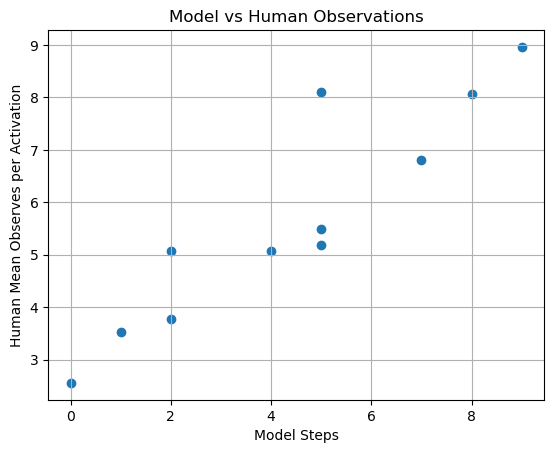

In [41]:
import matplotlib.pyplot as plt

plt.scatter(arr_model, arr_human)
plt.xlabel('Model Steps')
plt.ylabel('Human Mean Observes per Activation')
plt.title('Model vs Human Observations')
plt.grid(True)

# Plot error bars for human confidence intervals
ci_lowers = [human_data[key.replace("_ascii", "")]['ci_lower'] for key in steps_dict if key.replace("_ascii", "") in human_data]
ci_uppers = [human_data[key.replace("_ascii", "")]['ci_upper'] for key in steps_dict if key.replace("_ascii", "") in human_data]
yerr = [np.array(arr_human) - np.array(ci_lowers), np.array(ci_uppers) - np.array(arr_human)]
plt.errorbar(arr_model, arr_human, yerr=yerr, fmt='o', color='tab:blue', alpha=0.5, capsize=5)
plt.show()